# Introduction : without units

Use the well known RC circuit as a use case : see [this post](https://medium.com/towards-data-science/interactive-plotting-the-well-know-rc-circuit-in-jupyter-d153c0e9d3a).

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x113fbda90>
   status: 0
  success: True
        t: array([0.00000000e+00, 7.59946138e-09, 1.51989228e-08, 2.50223573e-08,
       3.66479844e-08, 5.07872264e-08, 6.83868268e-08, 9.11738189e-08,
       1.00000000e-07])
 t_events: None
        y: array([[0.        , 0.53222838, 0.78118971, 0.91798159, 0.97425721,
        0.99363364, 0.99879816, 0.99977132, 0.99990535]])
 y_events: None

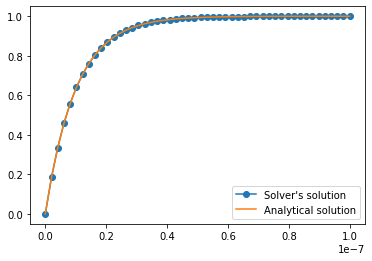

In [15]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
 
# in Ohms
R = 10000
# in Farad
capa = 1*10**-12
# time constant
tau= R*capa
# Source in volts
Ve = 1
# initial tension in volts
y0 = [0]
 
def analytical_solution(t):
    return (y0[0]-Ve)*np.exp(-t/tau) + Ve
 
def source_tension(t):
    return Ve
 
def RHS_dydt(t, y):
    return 1/(tau)*(source_tension(t) - y)
 
t_span = (0, 10*tau)

solution = scipy.integrate.solve_ivp(
    RHS_dydt,
    t_span,
    y0,
    dense_output=True,
)

# lets visualize the solver's solution along
# with the analytical solution
fig, ax = plt.subplots()
ech_t = np.linspace(0, 10*tau)

ax.plot(ech_t,
        solution.sol(ech_t)[0],
        "-o", 
        label="Solver's solution")
ax.plot(ech_t,
        analytical_solution(ech_t),
        label="Analytical solution")
ax.legend()
solution

# With units
We use the convenience function wrapped `from physipy.integrate import solve_ivp`

In [1]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
 
from physipy import units, s, set_favunit, setup_matplotlib
from physipy.integrate import solve_ivp
    
setup_matplotlib()
    
ohm = units["ohm"]
F = units["F"]
V = units["V"]

# in Ohms
R = 10000 * ohm
# in Farad
capa = 1*10**-12 * F
# time constant
tau= R*capa
# Source in volts
Ve = 1 * V
# initial tension in volts
y0 = [0*V]

@set_favunit(V)
def analytical_solution(t):
    return (y0[0]-Ve)*np.exp(-t/tau) + Ve
 
def RHS_dydt(t, y):
    return 1/(tau)*(Ve - y)
 
t_span = (0*s, 10*tau)

solution = solve_ivp(
    RHS_dydt,
    t_span,
    y0,
    dense_output=True,
)

In [14]:
solution.t

<Quantity : [0.00000000e+00 7.59946138e-09 1.51989228e-08 2.50223573e-08
 3.66479844e-08 5.07872264e-08 6.83868268e-08 9.11738189e-08
 1.00000000e-07] s>

In [15]:
solution.y[0]

<Quantity : [0.         0.53222838 0.78118971 0.91798159 0.97425721 0.99363364
 0.99879816 0.99977132 0.99990535] kg*m**2/(A*s**3)>

In [14]:
solution.sol(1)

<Quantity : [-3.53337710e+27 -4.04876348e+27 -4.96710881e+27 -4.14687472e+27
 -5.23213177e+27 -6.49330444e+27 -5.23213177e+27 -6.63487996e+27
 -7.99034760e+27 -6.49330444e+27 -7.99034760e+27 -9.24707937e+27
 -7.73180600e+27 -9.14570104e+27 -1.01782558e+28] kg*m**2/(A*s**3)>

/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:685: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")


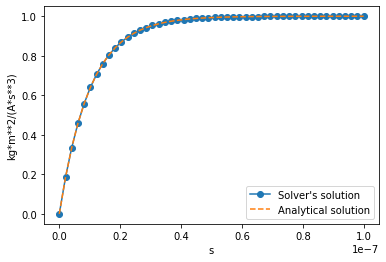

In [4]:
# lets visualize the solver's solution along
# with the analytical solution
fig, ax = plt.subplots()
ech_t = np.linspace(0*s, 10*tau)

ax.plot(ech_t,
        solution.sol(ech_t)[0],
        "-o", 
        label="Solver's solution")
ax.plot(ech_t,
        analytical_solution(ech_t),
        "--",
        label="Analytical solution")
ax.legend()

In [12]:
print((solution.sol(ech_t)[0]/ analytical_solution(ech_t)-1)*100)

[            nan  6.50659914e-02  4.26739969e-02 -2.48627349e-03
 -1.21530454e-02  1.23336934e-03  2.12741657e-04 -8.61517124e-03
 -4.24913218e-03  9.17517376e-03  1.02650454e-02 -1.48950007e-03
 -1.25405664e-02 -6.59874214e-03  4.38860642e-03  7.90683925e-03
  1.62129854e-03 -9.21815606e-03 -1.35626641e-02 -6.10021428e-03
  2.88558322e-03  7.12942648e-03  4.57301468e-03 -3.25857596e-03
 -1.17374258e-02 -1.35648949e-02 -7.68558735e-03 -4.25162696e-04
  4.83081639e-03  6.28549470e-03  3.59206358e-03 -2.25678671e-03
 -9.01744952e-03 -1.32666908e-02 -1.13638004e-02 -6.42653459e-03
 -1.02849727e-03  3.40529747e-03  5.94751006e-03  6.14723792e-03
  4.01282719e-03 -2.05914180e-06 -5.00974856e-03 -9.69774644e-03
 -1.23362084e-02 -1.11315653e-02 -9.06998563e-03 -7.39385775e-03
 -6.03461067e-03 -4.92555702e-03]


# Solve multiple equations

We create various systems with different parameters and use numpy broadcasting : 
 - several resistance
 - several capa
 
The only modification must be : 
 - t_span is the same for all systems, so still a 2-uple
 - must specify initial condition for each system, so y0 is now a N-iterable (for N systems)

In [8]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
 
from physipy import units, s, set_favunit, setup_matplotlib
from physipy.integrate import solve_ivp
    
setup_matplotlib()
    
ohm = units["ohm"]
F = units["F"]
V = units["V"]

Rs_, capas_ = np.meshgrid(10000 * ohm + np.linspace(-1000, +1000, num=3)*ohm, 
                          1*10**-12 * F + np.linspace(-0.2, 0.2, num=5)*10**-12*F,
                         )
# in Ohms
R = Rs_.flatten()
R.favunit = ohm
# in Farad
capa = capas_.flatten()
capa.favunit = F
# time constant
tau= R*capa
# Source in volts
Ve = 1 * V
# initial tension in volts
y0 = np.ones_like(R)* 0*V

def RHS_dydt(t, y):
    return 1/(tau)*(Ve - y)
 
t_span = (0*s, 5*np.max(tau))

solution = solve_ivp(
    RHS_dydt,
    t_span,
    y0,
    dense_output=True,
    t_eval=np.linspace(0*s, 5*np.max(tau), num=100),
)
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: <function solve_ivp.<locals>.sol_q at 0x1051a0940>
   status: 0
  success: True
        t: <Quantity : [0.00000000e+00 6.66666667e-10 1.33333333e-09 2.00000000e-09
 2.66666667e-09 3.33333333e-09 4.00000000e-09 4.66666667e-09
 5.33333333e-09 6.00000000e-09 6.66666667e-09 7.33333333e-09
 8.00000000e-09 8.66666667e-09 9.33333333e-09 1.00000000e-08
 1.06666667e-08 1.13333333e-08 1.20000000e-08 1.26666667e-08
 1.33333333e-08 1.40000000e-08 1.46666667e-08 1.53333333e-08
 1.60000000e-08 1.66666667e-08 1.73333333e-08 1.80000000e-08
 1.86666667e-08 1.93333333e-08 2.00000000e-08 2.06666667e-08
 2.13333333e-08 2.20000000e-08 2.26666667e-08 2.33333333e-08
 2.40000000e-08 2.46666667e-08 2.53333333e-08 2.60000000e-08
 2.66666667e-08 2.73333333e-08 2.80000000e-08 2.86666667e-08
 2.93333333e-08 3.00000000e-08 3.06666667e-08 3.13333333e-08
 3.20000000e-08 3.26666667e-08 3

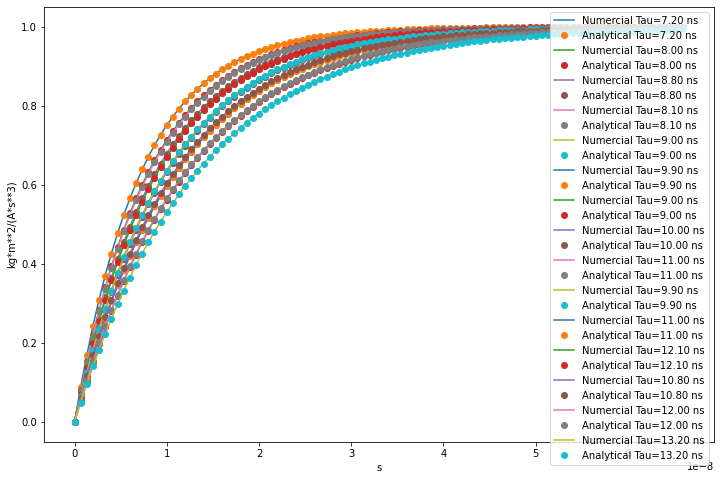

In [9]:
@set_favunit(V)
def analytical_solution(t):
    return (y0-Ve)*np.exp(-t/tau) + Ve
 
ns = units["ns"]
tau.favunit = ns
    
analytical_solutions = analytical_solution(solution.t[:, np.newaxis]).T

fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(R)):
    ax.plot(solution.t,
            solution.y[i],
            label=f"Numercial Tau={tau[i]:.2f}")
    ax.plot(solution.t,
            analytical_solutions[i], 
            "o", 
            label=f"Analytical Tau={tau[i]:.2f}")
ax.legend()

# Performance comparison

In [3]:
def timeit_without_unit():
    import scipy.integrate
    import numpy as np
     
    # in Ohms
    R = 10000
    # in Farad
    capa = 1*10**-12
    # time constant
    tau= R*capa
    # Source in volts
    Ve = 1
    # initial tension in volts
    y0 = [0]

    def RHS_dydt(t, y):
        return 1/(tau)*(source_tension(t) - y)
     
    t_span = (0, 10*tau)
    
    %timeit scipy.integrate.solve_ivp(RHS_dydt, t_span, y0, dense_output=True)
    %timeit scipy.integrate.solve_ivp(RHS_dydt, t_span, y0, dense_output=False)
    

def timeit_with_unit():
    import numpy as np
    from physipy.integrate import solve_ivp     
    from physipy import units, s, set_favunit, setup_matplotlib
        
    setup_matplotlib()
        
    ohm = units["ohm"]
    F = units["F"]
    V = units["V"]
    
    # in Ohms
    R = 10000 * ohm
    # in Farad
    capa = 1*10**-12 * F
    # time constant
    tau= R*capa
    # Source in volts
    Ve = 1 * V
    # initial tension in volts
    y0 = [0*V]
     
    def RHS_dydt(t, y):
        return 1/(tau)*(Ve - y)
     
    t_span = (0*s, 10*tau)

    %timeit solve_ivp(RHS_dydt, t_span, y0, dense_output=True)
    %timeit solve_ivp(RHS_dydt, t_span, y0, dense_output=False)

    
timeit_without_unit()
timeit_with_unit()

995 µs ± 7.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
906 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.37 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.27 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


So, yeah, do not use units if performance is important...